# Polynomial Regression Implementation

In this Notebook, i have coreved Polynomial Regression and how it improves our results for Non-linear Data.

In [1]:
## importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## creating the dataset
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 ** X + 2 + np.random.randn(200, 1)

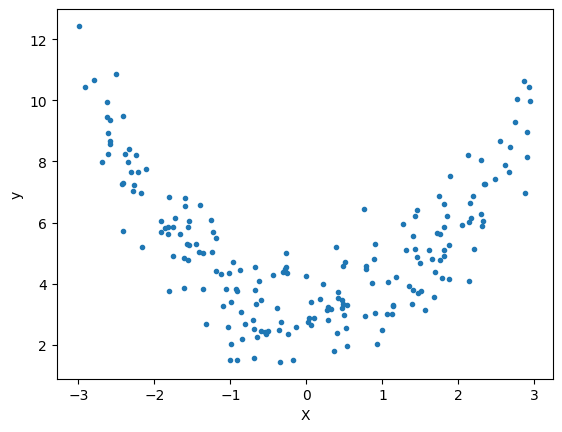

In [4]:
## plotting the dataset
plt.plot(X, y, ".")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [15]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## fitting the data into the model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
## making predictions
y_pred = model.predict(X_test)

In [17]:
## checking the performance of the model
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Score:", score)

Score: -0.31176756117599913


The performance is very poor. Let's see how the plot looks like -

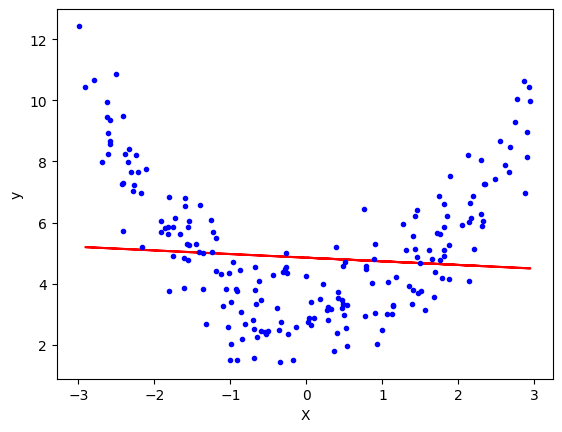

In [20]:
## plotting the graph
plt.plot(X_train, model.predict(X_train), color = "r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

We can see that our model is not able to generalize the data well. 

## Applying Polynomial Regression

In [21]:
## Applying Polynomial Regression with degree = 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [22]:
## Transforming X and y
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [23]:
print(X_train[0])
print(X_train_trans[0])

[2.30093412]
[1.         2.30093412 5.29429785]


In [24]:
## Fitting the model again
poly_model = LinearRegression()
poly_model.fit(X_train_trans, y_train)

LinearRegression()

In [25]:
## making predictions
y_pred_poly = poly_model.predict(X_test_trans)

In [27]:
## checking performance
poly_r2_score = r2_score(y_test, y_pred_poly)
print("Score:", poly_r2_score)

Score: 0.8343194130493963


This shows there's a huge improvement in models score.

In [31]:
## plotting the graph
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_model.predict(X_new_poly)

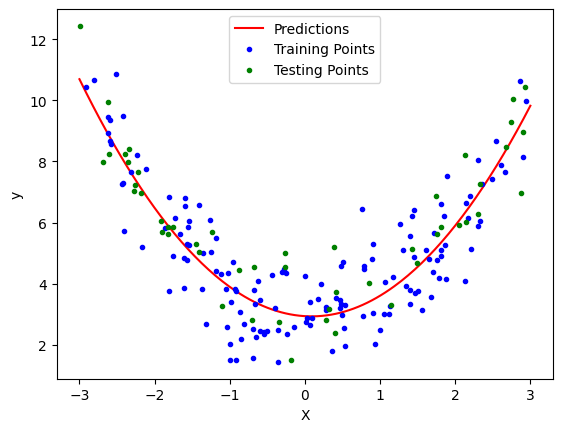

In [32]:
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [68]:
## making a function to address how change in degree will affect the best fit line.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_polynomial_regression(degree):
    # 1. our dataset
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=True)
    std_scaler = StandardScaler()
    line_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("polybig_features:", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", line_reg)
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, "r", label="Degree" + str(degree), linewidth=2)
    
    # 4. Plotting it
    plt.plot(X_test, y_test, "b.")
    plt.plot(X_train, y_train, "g.")
    plt.title(f"Polynomial Regression (degree = {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc = 'upper center')
    plt.axis([-3, 3, 0, 10])
    plt.show()

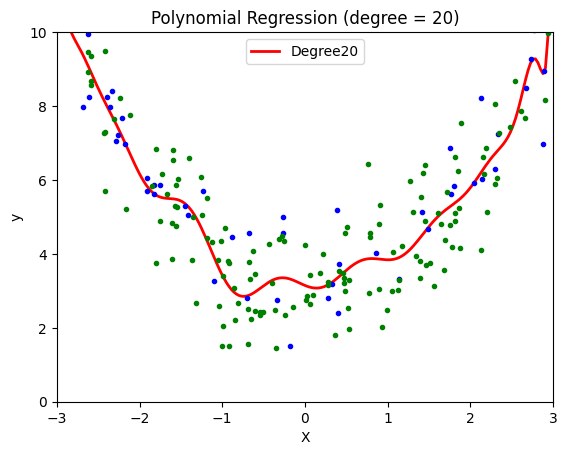

In [70]:
plot_polynomial_regression(20)